# Transactions Categorization
### JJD-Predictors


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_transactions = pd.read_pickle("./transactions_BC.pkl")
data_transactions_category = data_transactions[~data_transactions['descripcion'].isnull()]

del data_transactions

En las ref1 de las descripciones del subsector de "Telefonia fija" (con unica descripcion "Servicios de telefonía fija"), hay mucho ruido, por lo cual se procede a limpiar este campo

In [5]:
a = data_transactions_category.loc[data_transactions_category["subsector"]=='TELEFONIA FIJA'].ref.unique()

In [6]:
list_numbers = set(range(len(a)))
list_numbers = list(list_numbers - set([0, 1, 2, 3, 4, 5, 6, 9, 12, 24, 30]))
list_numbers

for i in list_numbers:
    index_list = data_transactions_category.loc[data_transactions_category["ref"]==a[i]].index.values
    for element in index_list:
        data_transactions_category.at[element,"ref"] = a[5]

In [7]:
a = data_transactions_category.loc[data_transactions_category["subsector"]=='TELEFONIA FIJA'].ref.unique()
a

array(['pago saldo', 'recarga express', 'pago servicio movil',
       'recarga prepago', 'recarga celular', 'pago servicio fijo',
       'pago ciclo', 'pago servicio movil ppn', 'recarga celular ppn',
       'pago servicio fijo ppn', 'factura plan tigo'], dtype=object)

# Analisis Descriptivo

Sabemos que el 27% de las transacciones llegan a usuarios de Bancolombia, y esto implica que para estas transferencias se tienen los campos "sector", "subsector" y "descripcion". Nuestra idea es aprovechar la descripcion para asignarle una categoria a las transacciones. El numero de subsectores distintos en la base de datos es de 49.

49


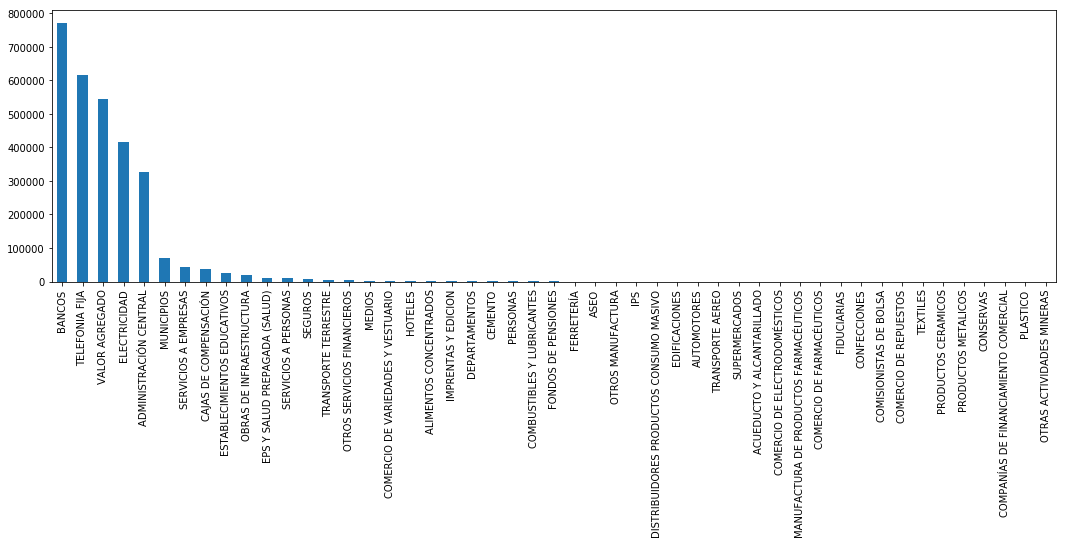

In [8]:
print(len(data_transactions_category.subsector.value_counts()))
data_transactions_category.subsector.value_counts().plot(kind='bar',figsize = (18,5))

El numero de descripciones distintas que existe de las transacciones es de 136. Estas descripciones se pueden usar para categorizar cada transaccion.

136


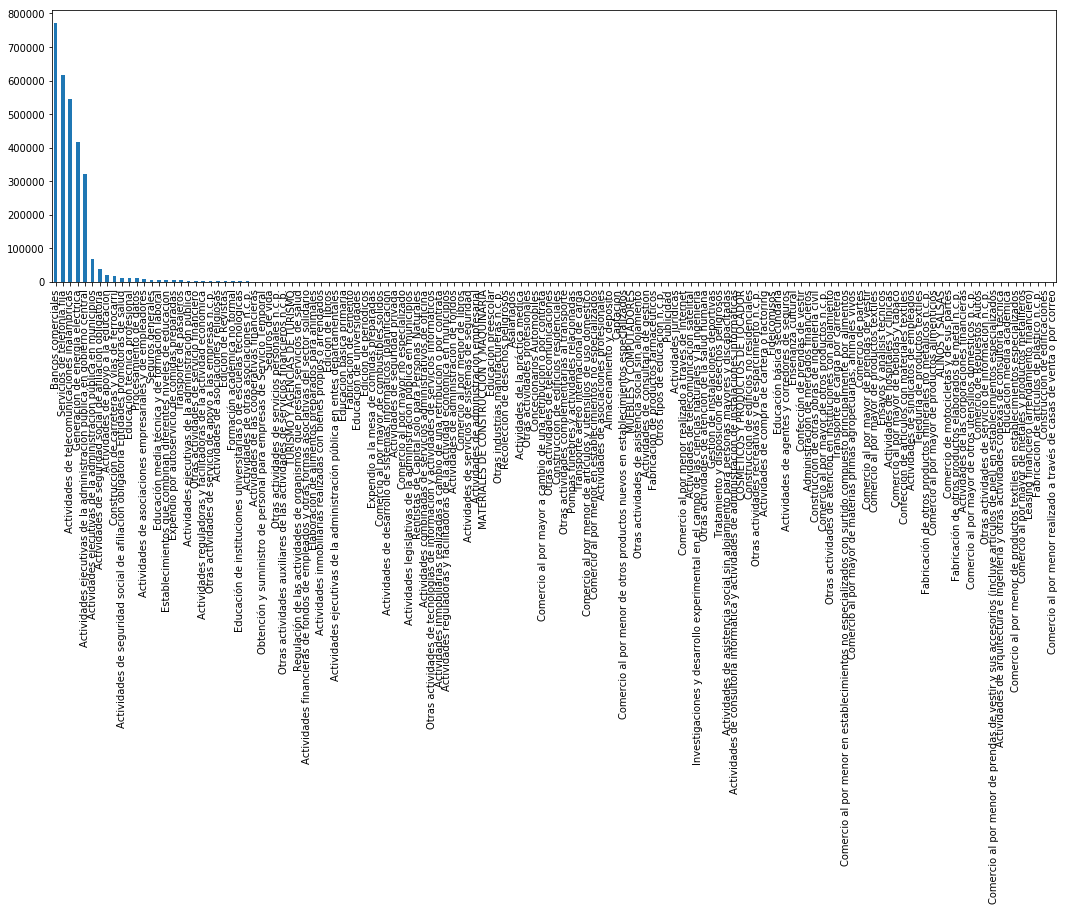

In [9]:
print(len(data_transactions_category.descripcion.value_counts()))
data_transactions_category.descripcion.value_counts().plot(kind='bar',figsize = (18,5))

A continuacion se muestra cuantas descripciones distintas hay para cada subsector. Note que "Servicios a personas" es el subsector que incluye el mayor numero de descripciones distintas. Ademas, note que aunque "BANCOS" solo contiene una descripcion es el subsector con el mayor de numero de ref1 distintas, como se muestra a continuacion.

In [10]:
dict_number_of_descripctions_per_sector = dict()
df_subsector = data_transactions_category.groupby(["subsector"])
for subsector in data_transactions_category.subsector.unique():
    dict_number_of_descripctions_per_sector[subsector] =  len(df_subsector.get_group(subsector).descripcion.unique())
    
print(sum(dict_number_of_descripctions_per_sector.values()))
dict_number_of_descripctions_per_sector

136


{'ACUEDUCTO Y ALCANTARILLADO': 1,
 'ADMINISTRACIÓN CENTRAL': 3,
 'ALIMENTOS CONCENTRADOS': 1,
 'ASEO': 2,
 'AUTOMOTORES': 2,
 'BANCOS': 1,
 'CAJAS DE COMPENSACIÓN': 1,
 'CEMENTO': 1,
 'COMBUSTIBLES Y LUBRICANTES': 1,
 'COMERCIO DE ELECTRODOMÉSTICOS': 1,
 'COMERCIO DE FARMACÉUTICOS': 1,
 'COMERCIO DE REPUESTOS': 2,
 'COMERCIO DE VARIEDADES Y VESTUARIO': 12,
 'COMISIONISTAS DE BOLSA': 1,
 'COMPANÍAS DE FINANCIAMIENTO COMERCIAL': 1,
 'CONFECCIONES': 1,
 'CONSERVAS': 1,
 'DEPARTAMENTOS': 1,
 'DISTRIBUIDORES PRODUCTOS CONSUMO MASIVO': 4,
 'EDIFICACIONES': 3,
 'ELECTRICIDAD': 1,
 'EPS Y SALUD PREPAGADA (SALUD)': 1,
 'ESTABLECIMIENTOS EDUCATIVOS': 10,
 'FERRETERÍA': 1,
 'FIDUCIARIAS': 1,
 'FONDOS DE PENSIONES': 1,
 'HOTELES': 1,
 'IMPRENTAS Y EDICION': 1,
 'IPS': 3,
 'MANUFACTURA DE PRODUCTOS FARMACÉUTICOS': 1,
 'MEDIOS': 3,
 'MUNICIPIOS': 4,
 'OBRAS DE INFRAESTRUCTURA': 2,
 'OTRAS ACTIVIDADES MINERAS': 1,
 'OTROS MANUFACTURA': 1,
 'OTROS SERVICIOS FINANCIEROS': 6,
 'PERSONAS': 2,
 'PLASTICO'

## Descripciones
Ahora se estudiara el comportamiento del campo ref para cada descripcion

In [12]:
import operator
dict_number_of_ref_per_description = dict()
df_descripcion = data_transactions_category.groupby(["descripcion"])
for descripcion in data_transactions_category.descripcion.unique():
    dict_number_of_ref_per_description[descripcion] =  len(df_descripcion.get_group(descripcion).ref.unique())
    
print(sum(dict_number_of_ref_per_description.values()))
sorted_dict_number_of_ref_per_description = sorted(dict_number_of_ref_per_description.items(), key=operator.itemgetter(1))
sorted_dict_number_of_ref_per_description

15672


[('Comercio de motocicletas y de sus partes', 1),
 ('Otras actividades de servicio de información n.c.p.', 1),
 ('Comercio al por menor realizado a través de casas de venta o por correo',
  1),
 ('Comercio de Repuestos Autos', 1),
 ('Construcción de edificaciones', 1),
 ('Fabricación de otros productos minerales no metálicos n.c.p.', 1),
 ('Administración de mercados financieros', 1),
 ('Educación media académica', 1),
 ('Comercio al por menor de otros productos nuevos en establecimientos especializados',
  1),
 ('Actividades de las corporaciones financieras', 1),
 ('Comercio al por mayor de metales y productos metalíferos', 1),
 ('Comercio al por mayor de prendas de vestir', 1),
 ('Fabricación de artículos de plástico n.c.p.', 1),
 ('Comercio al por mayor de otros utensilios domésticos n.c.p.', 1),
 ('Construcción de carreteras y vías de ferrocarril', 1),
 ('Comercio al por menor de prendas de vestir y sus accesorios (incluye artículos de piel) en establecimientos especializados',
  1

## Ref por descripcion

In [13]:
df = data_transactions_category.groupby("subsector")

A continuacion nuestro proposito es asignarle una categoria a las referencias mas usadas de cada subsector. Para esta labor nos apoyaremos en las descripciones de las transacciones, y solo consideraremos las transacciones con descripciones. 

## Subsector BANCOS

In [14]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=='BANCOS'].ref.count()
len(df.get_group("BANCOS").groupby('ref').filter(lambda x: len(x) >= 0.001*filtro).ref.value_counts())

39

In [15]:
df.get_group("BANCOS").groupby('ref').filter(lambda x: len(x) >= 0.001*filtro).ref.value_counts()
cate_bancos = pd.DataFrame({"ref":df.get_group("BANCOS").groupby('ref').filter(lambda x: len(x) >= 0.001*filtro).ref.unique()})
cate_bancos["clasificacion"] = np.nan

cate_bancos

,ref,clasificacion
0,cpv,NaN
1,pago factura asociado bancoomevapfa,NaN
2,acueducto,NaN
3,tarjeta credito visa,NaN
4,metrotel,NaN
5,pago banco occidente tarjeta credito visa,NaN
6,serviciudad esp,NaN
7,gases caribe sa esp,NaN
8,tarjeta credito visa amex,NaN
9,recarga nequi pse,NaN


In [16]:
cate_bancos_list = ["Otros", "Pago de Deudas", "Hogar", "Pago de Deudas", "TyC", "Pago de Deudas", "Hogar", "Hogar",
                    "Pago de Deudas", "Otros","Pago de Deudas", "Pago de Deudas", "Salud", "Otros", "Hogar", 
                    "Pago de Deudas", "Hogar", "Pago de Deudas","Pago de Deudas", "TyC", "Pago de Deudas", 
                    "Pago de Deudas", "Pago de Deudas", "Pago de Deudas", "Otros", "Pago de Deudas",
                    "Pago de Deudas", "Otros", "Pago de Deudas", "Educacion", "Educacion", "Pago de Deudas",
                    "Hogar", "Pago de Deudas", "Pago de Deudas", "Hogar","Pago de Deudas", "Hogar", "Otros"]
len(cate_bancos_list)

39

In [17]:
cate_bancos["clasificacion"] = cate_bancos_list
cate_bancos

,ref,clasificacion
0,cpv,Otros
1,pago factura asociado bancoomevapfa,Pago de Deudas
2,acueducto,Hogar
3,tarjeta credito visa,Pago de Deudas
4,metrotel,TyC
5,pago banco occidente tarjeta credito visa,Pago de Deudas
6,serviciudad esp,Hogar
7,gases caribe sa esp,Hogar
8,tarjeta credito visa amex,Pago de Deudas
9,recarga nequi pse,Otros


## Subsector TELEFONIA FIJA

In [18]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=='TELEFONIA FIJA'].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=='TELEFONIA FIJA'].descripcion2.unique()

['Servicios de telefonía fija']


array([nan], dtype=object)

In [19]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=='TELEFONIA FIJA'].ref.count()
cate_telefonia = pd.DataFrame({"ref":df.get_group("TELEFONIA FIJA").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_telefonia["clasificacion"] = "TyC"
cate_telefonia

,ref,clasificacion
0,pago saldo,TyC
1,recarga express,TyC
2,pago servicio movil,TyC
3,recarga prepago,TyC
4,recarga celular,TyC
5,pago servicio fijo,TyC
6,pago ciclo,TyC


## Subsector Valor Agregado

In [20]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=='VALOR AGREGADO'].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=='VALOR AGREGADO'].descripcion2.unique()

['Actividades de telecomunicaciones inalámbricas'
 'Actividades de telecomunicación satelital']


array([nan], dtype=object)

In [21]:
data_transactions_category.loc[data_transactions_category["subsector"]=='VALOR AGREGADO'].ref.unique()

array(['referencia pago express', 'ref pago express', 'recarga',
       'recarga numero', 'referencia pago app b', 'referencia pago',
       'pago factura mitigo app', 'pago facturas: acb',
       'pago facturas mitigoapp', 'webpayment vc description',
       'pago facturas: at', 'solo m', 'referencia pago app bi',
       'mes enero', 'm', 'recarga cel', 'ref pago express cel',
       'pago facturas at', 'mes noviembre', 'recarga numero cel',
       'directv colombia ltda', 'referencia pago express cel',
       'factura mes diciembre', 'pago facturas: acb acb',
       'pago facturas ee', 'pago facturas: at at', 'mes febrero',
       'ref pago express b', 'pago mes septiembre', 'factura mes octubre',
       'referencia pago express d', 'ref pago express c',
       'referencia pago express i'], dtype=object)

In [22]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=='VALOR AGREGADO'].ref.count()
cate_valor_agregado = pd.DataFrame({"ref":df.get_group("VALOR AGREGADO").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_valor_agregado["clasificacion"] = "TyC"
cate_valor_agregado

,ref,clasificacion
0,referencia pago express,TyC
1,ref pago express,TyC
2,recarga,TyC
3,recarga numero,TyC
4,referencia pago app b,TyC
5,referencia pago,TyC
6,pago factura mitigo app,TyC
7,pago facturas mitigoapp,TyC


## Sector ELECTRICIDAD

In [23]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=="ELECTRICIDAD"].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=="ELECTRICIDAD"].descripcion2.unique()

['Generación de energía eléctrica']


array([nan], dtype=object)

In [24]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=='ELECTRICIDAD'].ref.count()
cate_electricidad = pd.DataFrame({"ref":df.get_group("ELECTRICIDAD").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_electricidad["clasificacion"] = "Hogar"
cate_electricidad

,ref,clasificacion
0,empresas publicas medellin esp,Hogar


## Subsector ADMINISTRACION CENTRAL

In [25]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=="ADMINISTRACIÓN CENTRAL"].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=="ADMINISTRACIÓN CENTRAL"].descripcion2.unique()

['Actividades ejecutivas de la administración pública en gobierno central'
 'Actividades reguladoras y facilitadoras de la actividad económica'
 'Actividades ejecutivas de la administración publica']


array([nan], dtype=object)

In [26]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=='ADMINISTRACIÓN CENTRAL'].ref.count()
cate_admin = pd.DataFrame({"ref":df.get_group("ADMINISTRACIÓN CENTRAL").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_admin["clasificacion"] = "Gobierno"
cate_admin

,ref,clasificacion
0,transaccion generacion certificados tradicion ...,Gobierno
1,transaccion consulta indice propietarios,Gobierno
2,recarga cuenta prepago%c plataforma generacion...,Gobierno
3,permiso carga pesada extradimensionada%a placa,Gobierno
4,compra municipio medellin secretaria transito,Gobierno
5,factura concepto impuesto predial,Gobierno
6,pago recibos derechos registro,Gobierno
7,factura concepto industria comercio,Gobierno
8,solicitudes registro import,Gobierno


## Subsector Municipios

In [27]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=="MUNICIPIOS"].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=="MUNICIPIOS"].descripcion2.unique()

['Actividades ejecutivas de la administración pública en municipios'
 'Actividades reguladoras y facilitadoras de la actividad económica en municipios'
 'Regulación de las actividades de organismos que prestan servicios de salud'
 'Actividades legislativas de la administración pública en municipios']


array([nan, ' educativos'], dtype=object)

In [28]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=='ADMINISTRACIÓN CENTRAL'].ref.count()
cate_muni = pd.DataFrame({"ref":df.get_group("ADMINISTRACIÓN CENTRAL").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_muni["clasificacion"] = "Gobierno"
cate_muni

,ref,clasificacion
0,transaccion generacion certificados tradicion ...,Gobierno
1,transaccion consulta indice propietarios,Gobierno
2,recarga cuenta prepago%c plataforma generacion...,Gobierno
3,permiso carga pesada extradimensionada%a placa,Gobierno
4,compra municipio medellin secretaria transito,Gobierno
5,factura concepto impuesto predial,Gobierno
6,pago recibos derechos registro,Gobierno
7,factura concepto industria comercio,Gobierno
8,solicitudes registro import,Gobierno


## Subsector Cajas de Compensacion

In [29]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=='CAJAS DE COMPENSACIÓN'].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=='CAJAS DE COMPENSACIÓN'].descripcion2.unique()

['Actividades de seguridad social de afiliación obligatoria']


array([nan], dtype=object)

In [30]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=='CAJAS DE COMPENSACIÓN'].ref.count()
cate_cajas = pd.DataFrame({"ref":df.get_group("CAJAS DE COMPENSACIÓN").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_cajas["clasificacion"] = "Entretenimiento"
cate_cajas.loc[cate_cajas["ref"] =="pago de credito comfama","clasificacion"] = "Pago de Deudas"
cate_cajas[100:]

,ref,clasificacion
100,natacion nivel (jad ),Entretenimiento
101,guitarra nivel ( a?os),Entretenimiento
102,semillero baloncesto ( a?os),Entretenimiento
103,tenis campo nivel ( a?os),Entretenimiento
104,gimnasia (ad+),Entretenimiento
105,decoraci?n fiestas tem?ticas (jad+),Entretenimiento
106,grupo coreogr?fico bachata (jad+),Entretenimiento
107,ballet ( años),Entretenimiento
108,gimnasia infantil ( a?os),Entretenimiento
109,jugando plastilina ( a?os),Entretenimiento


In [31]:
cate_cajas.loc[6, "clasificacion"] = "Comida"

## Subsector ESTABLECIMIENTOS EDUCATIVOS

In [32]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=='ESTABLECIMIENTOS EDUCATIVOS'].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=='ESTABLECIMIENTOS EDUCATIVOS'].descripcion2.unique()

['Educación básica primaria'
 'Establecimientos que combinan diferentes niveles de educación'
 'Educación técnica profesional'
 'Educación media técnica y de formación laboral'
 'Formación académica no formal'
 'Educación de instituciones universitarias o de escuelas tecnológicas'
 'Educación de universidades' 'Educación preescolar'
 'Educación media académica' 'Educación básica secundaria']


array([nan], dtype=object)

In [33]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=='CAJAS DE COMPENSACIÓN'].ref.count()
cate_edu = pd.DataFrame({"ref":df.get_group("ESTABLECIMIENTOS EDUCATIVOS").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_edu["clasificacion"] = "Educacion"
cate_edu

,ref,clasificacion
0,compra universidad antioquia,Educacion
1,pago ordinario fic,Educacion
2,recarga biofood software,Educacion
3,pago,Educacion
4,pension,Educacion
5,colegio calasanz medell?n marzo,Educacion
6,reintegro viaticos,Educacion
7,colegio calasanz medell?n julio,Educacion
8,pago documentos: pago documentos:,Educacion
9,pago web,Educacion


In [34]:
cate_edu.loc[41, "clasificacion"] = "Moda"
cate_edu.loc[47, "clasificacion"] = "Hogar"

## Subsector Obras de infraestructura

In [35]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=='OBRAS DE INFRAESTRUCTURA'].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=='OBRAS DE INFRAESTRUCTURA'].descripcion2.unique()

['Construcción de carreteras y vías de ferrocarril'
 'Construcción de otras obras de ingeniería civil']


array([nan], dtype=object)

In [36]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=='OBRAS DE INFRAESTRUCTURA'].ref.count()
cate_infra = pd.DataFrame({"ref":df.get_group("OBRAS DE INFRAESTRUCTURA").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_infra["clasificacion"] = "Transporte"
cate_infra

,ref,clasificacion
0,recaudo peaje,Transporte


## Subsector EPS y Salud Prepagada

In [37]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=='EPS Y SALUD PREPAGADA (SALUD)'].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=='EPS Y SALUD PREPAGADA (SALUD)'].descripcion2.unique()

[ 'Actividades de seguridad social de afiliación obligatoria Entidades promotoras de salud']


array([nan], dtype=object)

In [38]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=="EPS Y SALUD PREPAGADA (SALUD)"].ref.count()
cate_eps = pd.DataFrame({"ref":df.get_group("EPS Y SALUD PREPAGADA (SALUD)").groupby('ref').filter(lambda x: len(x) >= filtro*0.00001).ref.unique()})
cate_eps["clasificacion"] = "Salud"
cate_eps

,ref,clasificacion
0,cartera,Salud


## Subsector Servicios a Personas

In [39]:
data_transactions_category.loc[data_transactions_category["subsector"]=='SERVICIOS A PERSONAS'].descripcion.value_counts()

Expendio por autoservicio de comidas preparadas                                            5363
Actividades de asociaciones religiosas                                                     1653
Actividades de otras asociaciones n.c.p.                                                    917
Otras actividades de servicios personales n.c.p.                                            709
Actividades inmobiliarias realizadas con bienes propios o arrendados                        482
Expendio a la mesa de comidas preparadas                                                    303
Actividades inmobiliarias realizadas a cambio de una retribución o por contrata             194
Pompas fúnebres y actividades relacionadas                                                   64
Actividades de asociaciones profesionales                                                    51
Otras actividades de asistencia social sin alojamiento                                       43
Otros tipos de educación n.c.p.         

In [40]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=="SERVICIOS A PERSONAS"].ref.count()
cate_personas = pd.DataFrame({"ref":df.get_group("SERVICIOS A PERSONAS").groupby('ref').filter(lambda x: len(x) >= filtro*0.01).ref.unique()})
cate_personas["clasificacion"] = "Comida"
cate_personas

,ref,clasificacion
0,restaurante escolar,Comida
1,pago factura # cr catalejo alfa,Comida
2,cartera,Comida
3,pago documentos: pago documentos:,Comida
4,pago factura,Comida
5,pension,Comida
6,pago documentos:,Comida
7,compra comidas,Comida
8,pago servicio internet,Comida
9,pago orden #,Comida


## Subsector Seguros

In [41]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=='SEGUROS'].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=='SEGUROS'].descripcion2.unique()

['Seguros de vida' 'Seguros generales'
 'Actividades de agentes y corredores de seguros']


array([nan], dtype=object)

In [42]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=="SEGUROS"].ref.count()
cate_seguros = pd.DataFrame({"ref":df.get_group("SEGUROS").groupby('ref').filter(lambda x: len(x) >= filtro*0.002).ref.unique()})
cate_seguros["clasificacion"] = "Seguros"
cate_seguros

,ref,clasificacion
0,pago seguros vida,Seguros
1,pagare%a liberty seguros sa,Seguros
2,compra compañia inversiones colpatria seguros...,Seguros
3,pago mapfre seguros colombia,Seguros
4,compra seguros generales colpatria portal pago...,Seguros
5,seguros axa colpatria,Seguros
6,pago poliza riesgo,Seguros
7,compra mapfre seguros vida,Seguros
8,compra seguros generales colpatria online,Seguros


## Subsector Transporte Terrestre

In [43]:
print(data_transactions_category.loc[data_transactions_category["subsector"]=='TRANSPORTE TERRESTRE'].descripcion.unique())
data_transactions_category.loc[data_transactions_category["subsector"]=='TRANSPORTE TERRESTRE'].descripcion2.unique()

['Transporte de pasajeros'
 'Otras actividades complementarias al transporte'
 'Almacenamiento y depósito' 'Transporte de carga por carretera']


array([nan], dtype=object)

In [44]:
filtro

6912

In [45]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=="TRANSPORTE TERRESTRE"].ref.count()
cate_trans = pd.DataFrame({"ref":df.get_group("TRANSPORTE TERRESTRE").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_trans["clasificacion"] = "Transporte"
cate_trans

,ref,clasificacion
0,facturacion transporte,Transporte
1,pagos nuip,Transporte
2,transporte escolar,Transporte
3,pagos,Transporte
4,diciembre,Transporte
5,abril,Transporte
6,julio,Transporte
7,noviembre,Transporte
8,pago,Transporte
9,pago transporte colegio jesus,Transporte


## Subsector Otros servicios financieros

In [46]:
data_transactions_category.loc[data_transactions_category["subsector"]=='OTROS SERVICIOS FINANCIEROS'].descripcion.value_counts()

Otras actividades de servicio financiero                                                          2770
Actividades de las cooperativas financieras                                                        816
Otras actividades auxiliares de las actividades de servicios financieros n.c.p.                    589
Actividades financieras de fondos de empleados y otras formas asociativas del sector solidario     534
Actividades de compra de cartera o factoring                                                        15
Actividades de las corporaciones financieras                                                         2
Name: descripcion, dtype: int64

In [47]:
data_transactions_category.loc[data_transactions_category["subsector"]=='OTROS SERVICIOS FINANCIEROS'].ref.value_counts()

obligaciones tarjeta credito natural         740
cuota                                        352
pago planilla cesantias cedula ciudadania    338
pago planilla cesantias                      216
abono credito                                203
credito                                      158
pago cuota mes                               156
pago financiaci?n seguro educativo           155
abono pagare                                 153
excedente cuota                              152
pago cuota                                   138
valor cancelar                                85
cuota credito                                 79
saldo                                         74
abono pagare linea libre inversion            72
modifica valor cancelar                       68
obligaciones cartera natural                  61
saldo cancelar                                54
abono credito promosumma                      41
valor mora                                    34
abono obligacion    

## Subsector Medios

In [48]:
data_transactions_category.loc[data_transactions_category["subsector"]=='MEDIOS'].descripcion.value_counts()

Edición de Revistas                        1204
Edición de periódicos                       312
Otras actividades de telecomunicaciones      70
Name: descripcion, dtype: int64

In [49]:
data_transactions_category.loc[data_transactions_category["subsector"]=='MEDIOS'].ref.value_counts()

etce portal suscripciones                                       625
compra heraldo clasificados web                                 207
producto: paquete basico vehiculo:                               91
producto: paquete b?sico vehiculo:                               74
producto: paquete premium vehiculo:                              68
payment                                                          38
compra heraldo ofertashco                                        35
etc aviso: vivienda basico                                       33
guillermo rodriguez                                              32
producto: mas visibilidad vehiculo:                              22
clasificados tiempo pago aviso:                                  21
etc aviso: vivienda premium                                      17
tiempo                                                           17
etc aviso: vivienda estandar                                     16
etc aviso: empleos basico                       

In [50]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=="MEDIOS"].ref.count()
cate_medios = pd.DataFrame({"ref":df.get_group("MEDIOS").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_medios["clasificacion"] = "Subscripcion"
cate_medios

,ref,clasificacion
0,etce portal suscripciones,Subscripcion
1,producto: paquete basico vehiculo:,Subscripcion
2,clasificados tiempo pago aviso: gustavo rojas ...,Subscripcion
3,producto: paquete premium vehiculo:,Subscripcion
4,adquisicion,Subscripcion
5,compra heraldo clasificados web,Subscripcion
6,payment,Subscripcion
7,clasificados tiempo pago aviso:,Subscripcion
8,etc aviso: empleos basico,Subscripcion
9,producto: mas visibilidad vehiculo:,Subscripcion


## Demas subsectores

In [51]:
data_transactions_category.loc[data_transactions_category["subsector"]=='DEPARTAMENTOS'].descripcion.value_counts()

Actividades ejecutivas de la administración pública en entes departamentales    468
Name: descripcion, dtype: int64

In [52]:
filtro = data_transactions_category.loc[data_transactions_category["subsector"]=="DEPARTAMENTOS"].ref.count()
cate_departamentos = pd.DataFrame({"ref":df.get_group("DEPARTAMENTOS").groupby('ref').filter(lambda x: len(x) >= filtro*0.001).ref.unique()})
cate_departamentos["clasificacion"] = "Gobierno"
cate_departamentos

,ref,clasificacion
0,pago impuesto vehiculo psl vigencia,Gobierno
1,impuesto moto,Gobierno
2,pago impuesto,Gobierno
3,impuestos,Gobierno
4,impuesto a?o,Gobierno
5,pago impuesto vehiculo placa,Gobierno
6,impuesto vehiculo,Gobierno
7,pago impuestos,Gobierno
8,pago impuesto vehiculo vigencia,Gobierno
9,pago impuesto veh?culo,Gobierno


## Concatenacion clasificacion por sectores

Una vez realizada la clasificacion por subsectores, decidimos generar un unico dataFrame que uniera todas las clasificaciones. Ademas de las clasificaciones realizadas en este Notebook, decidimos clasificar las referencias mas repetidas que abarcaban el 50% del dataset que no contiene descripcion. La idea es usar este conjunto de referencias categorizadas para entrenar un modelo que logre asignarle una categorizacion al resto de las transacciones.

In [55]:
cate_otros = pd.read_pickle("./cate_otros.pkl")
frames = [cate_bancos, cate_electricidad, cate_cajas, cate_admin, cate_departamentos, cate_edu, cate_eps, cate_infra,
          cate_medios, cate_muni, cate_seguros, cate_telefonia, cate_trans, cate_valor_agregado, cate_otros]
df_categorias = pd.concat(frames)
df_categorias.clasificacion.value_counts()

Gobierno           136
Entretenimiento    112
Subscripcion        52
Educacion           48
Transporte          29
TyC                 26
Pago de Deudas      25
Otros               14
Hogar               12
Seguros             11
Viajes               2
Salud                2
Moda                 1
Comida               1
Name: clasificacion, dtype: int64

In [66]:
df_categorias.loc[df_categorias["ref"]=="credito hipotecario", "clasificacion"] = "Pago de Deudas"
df_categorias.loc[df_categorias["ref"]=="pago", "clasificacion"] = np.nan
df_categorias.loc[df_categorias["ref"]=="pagos", "clasificacion"] = np.nan
df_categorias.loc[df_categorias["ref"]=="factura", "clasificacion"] = np.nan
df_categorias.loc[df_categorias["ref"]=="cartera", "clasificacion"] = np.nan
df_categorias = df_categorias.drop_duplicates()
df_categorias = df_categorias.dropna()
df_categorias.ref.value_counts()

patinaje intermedio ( a?os)                                   1
producto: super destacado vehiculo:                           1
octubre                                                       1
pago impuestos moto placa depto huila                         1
etc aviso: vehiculos premium                                  1
pago impuesto placa año                                      1
pago obligacion:                                              1
agosto                                                        1
b:ingl?s preintermedio n (jad+)                               1
educacion formal formacion extensiva                          1
nataci?n estilo mariposa (jad+)                               1
capf horario mensual                                          1
club fotograf?a (jad+)                                        1
grupo coreogr?fico bachata (jad+)                             1
chiquif?tbol ( a?os)                                          1
ref pago express                        

In [68]:
df_categorias.to_pickle("./refs_classified.pkl")
df_categorias.to_csv("./refs_classified.csv", encoding = 'utf-8')

In [57]:
df_result = pd.merge(data_transactions_category, df_categorias, on='ref', how='inner' )

In [58]:
df_result.count()

id_trn_ach       2695481
id_cliente       2695481
fecha            2695481
hora             2695481
valor_trx        2695481
sector           2695481
subsector        2695481
descripcion      2695481
descripcion2         449
ref              2695481
clasificacion    2695481
dtype: int64

In [59]:
100*df_result.isnull().mean()

id_trn_ach        0.000000
id_cliente        0.000000
fecha             0.000000
hora              0.000000
valor_trx         0.000000
sector            0.000000
subsector         0.000000
descripcion       0.000000
descripcion2     99.983342
ref               0.000000
clasificacion     0.000000
dtype: float64

In [60]:
data_transactions_category.count()

id_trn_ach      2913814
id_cliente      2913814
fecha           2913814
hora            2913814
valor_trx       2913814
sector          2913814
subsector       2913814
descripcion     2913814
descripcion2      16207
ref             2913814
dtype: int64

In [61]:
# df_result.to_pickle("./transactions_with_category.pkl")

In [69]:
#df_result = pd.read_pickle("./transactions_with_category.pkl")
df_result.to_csv("./transactions_with_category.csv", encoding = 'utf-8')